In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def wrangle(file):
    try:
        #read file into dataframe
        df = pd.read_csv(file)
        #collinear and high_cardinal features
        cols_to_drop = ['Data.Temperature.Max Temp', 'Data.Temperature.Min Temp', 'Data.Wind.Direction','Date.Month', 'Date.Week of', 'Date.Year']
        #drop collinear and high_cardinal features
        df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
        #drop categorical features
        df.drop(columns=(df.select_dtypes('object').columns), inplace=True)  
        #rename columns for readability
        column_dict = {
            'Data.Precipitation':'Precipitation',
            'Data.Temperature.Avg Temp': 'Temperature',
            'Data.Wind.Speed': 'Wind'
        } 

        df.rename(columns=column_dict, inplace=True)
        #reorder columns
        df = df[['Wind', 'Temperature', 'Precipitation']]


        return df
        
    except FileNotFoundError:
        print(f"Error: The file '{file}' was not found.")

In [4]:
df = wrangle('weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Wind           16743 non-null  float64
 1   Temperature    16743 non-null  int64  
 2   Precipitation  16743 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 392.5 KB


In [5]:
df.columns

Index(['Wind', 'Temperature', 'Precipitation'], dtype='object')

In [7]:
#Is there a relationship between wind speed and precipitation? is precipitation dependent on wind speed


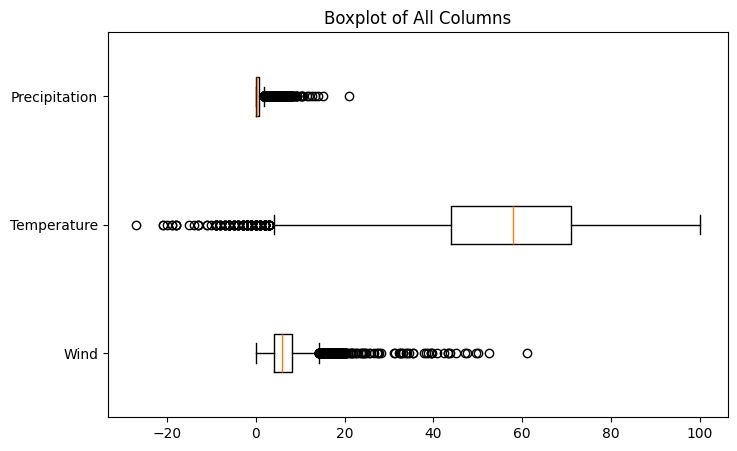

In [48]:
#visualize variables with boxplot
def plot_box(file):
    #get columns
    cols = file.columns
    #set fig size
    fig, ax = plt.subplots(figsize=(8,5))
    #loop through columns
    ax.boxplot([file[col] for col in cols], vert=False, tick_labels=file.columns)
    #ax.set_xlabel(df[col].name)
    ax.set_title('Boxplot of All Columns')
    #show figure
    plt.show();

#call figure
figure = plot_box(df)

In [49]:
df.describe()

,Wind,Temperature,Precipitation
count,16743.000000,16743.000000,16743.000000
mean,6.329820,56.089112,0.579090
std,3.494785,18.798295,0.988057
min,0.000000,-27.000000,0.000000
25%,4.040000,44.000000,0.000000
50%,5.940000,58.000000,0.190000
75%,8.080000,71.000000,0.750000
max,61.100000,100.000000,20.890000
